## **Problem Set 3: Time Series Analysis**
### **Due: Tuesday, February 13**

### **Setup**

**Please log into your Stanford Google Drive account when viewing this notebook.** Log in using your SUNetID credentials.

Before we can start Problem Set 3, we need to go through a few minor tasks, as we did in Problem Set 1:
1. Copy Google Colab Notebook (File > Save a copy in Drive)
2. Connect to Github Data Repo
3. Set Up Working Directory

The detailed instructions for the above tasks were provided in Problem Set 1, so we don't need to go through them again here. If you need assistance with any of the above tasks, please refer to Problem Set 1. We'll simply implement Tasks 2 and 3 in the code cell below. In addition, we'll also import all of the libraries we need to complete Problem Set 3.

In [1]:
# Clone github data repository
!git clone https://github.com/sfletcher23/CEE_266F_Data_Repo GitRepo

# set up working directory
import os
wdir = 'GitRepo/Data'
os.chdir(wdir)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.optimize import brentq as root
from math import gamma as GammFN
from scipy.optimize import fsolve
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.signal
from astropy.stats import bootstrap
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
import math

Cloning into 'GitRepo'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 79 (delta 29), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (79/79), 786.99 KiB | 4.12 MiB/s, done.
Resolving deltas: 100% (29/29), done.


For this assignment, we recommend that you use the code from class as a starting point: see [ARMA Model Demo](https://colab.research.google.com/drive/138mfw3Ays-DdM4q510vfq_du1uaD0EDW?usp=sharing) and [Trend Detection Demo](https://colab.research.google.com/drive/1XNjtiSNua0rVJKvwApeGv9oWczufKdVh?usp=sharing).  

### **Problem 1**: Mann-Kendall test

Consider the data shown below of riverine dissolved lead concentrations. Perform a 2-sided Mann-Kendall
test for monotonic trend in each season. Report the p-values of each test and whether or not you reject
the null hypothesis that there is no trend at the 5% level.

| Year  | 1  | 2  | 3  | 4  | 5  | 6  | 7  | 8  | 9  | 10 | 11 | 12 | 13 |
|-------|----|----|----|----|----|----|----|----|----|----|----|----|----|
| Winter| <1 | <1 | 5  | 2  | 17 | 26 | 8  | 1  | 6  | 1  | 2  | 4  | 1  |
| Spring| 5  | 3  | 6  | 3  | 2  | 9  | 3  | 1  | 1  | 3  | 4  | 2  | 3  |
| Summer| 8  | 2  | 5  | 7  | 19 | 4  | 9  | 1  | 4  | <1 | 1  | 1  | <1 |
| Fall  | <1 | 8  | 11 | 14 | 16 | <1 | 8  | 1  | 2  | 2  | 1  | 5  | 1  |


[0.5, 0.5, 1, 1, 1, 2, 2, 4, 5, 6, 8, 17, 26]
[1, 1, 2, 2, 3, 3, 3, 3, 3, 4, 5, 6, 9]
[0.5, 0.5, 1, 1, 1, 2, 4, 4, 5, 7, 8, 9, 19]
[0.5, 0.5, 1, 1, 1, 2, 2, 5, 8, 8, 11, 14, 16]
z-value for winter: 0.12927912407657152
z-value for spring: -1.0563286022020402
z-value for summer: -2.4563033574548587
z-value for autumn: -0.6870528454811501
p-value for season winter: 0.8971367893775919
Fail to reject null hypothesis for season winter
p-value for season spring: 0.29081811286613657
Fail to reject null hypothesis for season spring
p-value for season summer: 0.014037460384709745
Reject null hypothesis for season summer
p-value for season autumn: 0.4920494277323588
Fail to reject null hypothesis for season autumn


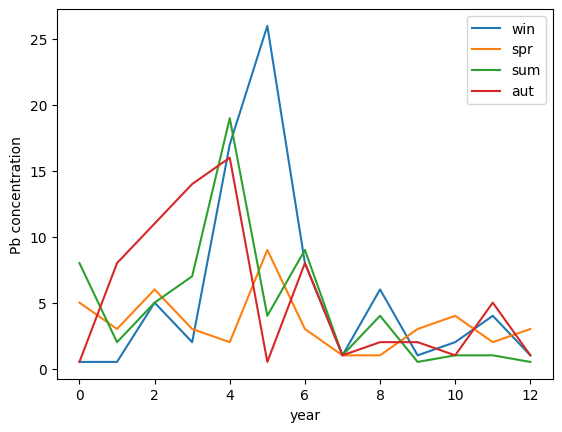

In [2]:
 #setup data variables per season
Y_win=[0.5,0.5,5,2,17,26,8,1,6,1,2,4,1]
Y_spr=[5,3,6,3,2,9,3,1,1,3,4,2,3]
Y_sum=[8,2,5,7,19,4,9,1,4,0.5,1,1,0.5]
Y_aut=[0.5,8,11,14,16,0.5,8,1,2,2,1,5,1]
#check data
plt.plot(Y_win, label='win')
plt.plot(Y_spr, label='spr')
plt.plot(Y_sum, label='sum')
plt.plot(Y_aut, label='aut')
plt.xlabel('year')
plt.ylabel('Pb concentration')
plt.legend()
#calculate ties
print(sorted(Y_win))
print(sorted(Y_spr))
print(sorted(Y_sum))
print(sorted(Y_aut))
from scipy.stats import norm
#calculte p value
def zcalculator(array,ties):
    p_count = 0
    n_count = 0
    for i in range(len(array)):
        for j in range(i+1, len(array)):
            if array[i] < array[j]:
                p_count += 1
            elif array[i] > array[j]:
                n_count += 1
    t_value = p_count-n_count
    n = len(array)
    var_t = ((n)*(n-1)*(2*n+5)-ties)/18
    if t_value > 0:
      z_value = (t_value-1)/math.sqrt(var_t)
    elif t_value == 0:
      z_value = 0
    else:
      z_value = (t_value+1)/math.sqrt(var_t)
    return z_value

seasons = ['winter','spring','summer','autumn']
ties = [528,174,528,222]

z_value_win = zcalculator(Y_win, 528)
print(f"z-value for winter:", z_value_win)

z_value_spr = zcalculator(Y_spr, 174)
print(f"z-value for spring:", z_value_spr)

z_value_sum = zcalculator(Y_sum, 528)
print(f"z-value for summer:", z_value_sum)

z_value_aut = zcalculator(Y_aut, 222)
print(f"z-value for autumn:", z_value_aut)

alpha = 0.05
# Step 3a: Get inverse CDF value for chosen level of significance i.e. what Z-score gives this CDF value
# For a two-tailed test, divide alpha by two and use abs value
CritVal = np.abs(ss.norm.ppf(alpha / 2))

# Step 3b: Equivalently, find p-value of Z-score (multiple by 2 for two-sided test)
pvaluewin = ss.norm.sf(np.abs(z_value_win)) * 2 # sf function is equivalent to 1 - CDF
pvaluespr = ss.norm.sf(np.abs(z_value_spr)) * 2
pvaluesum = ss.norm.sf(np.abs(z_value_sum)) * 2
pvalueaut = ss.norm.sf(np.abs(z_value_aut)) * 2

p_values = [pvaluewin, pvaluespr, pvaluesum, pvalueaut]

for i, p_value in enumerate(p_values):
    # Print p-value for each season
    print(f"p-value for season {seasons[i]}:", p_value)

    # Compare p-value with alpha/2
    reject = p_value < alpha / 2

    # Print result
    if reject:
        print(f"Reject null hypothesis for season {seasons[i]}")
    else:
        print(f"Fail to reject null hypothesis for season {seasons[i]}")


### **Problem 2**: Trends and change points analysis of Turkey River

In class we analyzed anannual maxima series to test for trends.Here we will apply the same methods to tests for trends and change points in the annual minimum 7-day flows at the same site using daily streamflow data from the Turkey River provided in "TurkeyRiver_GarberIA.csv".  Starter code to load in and pre-process the dataset has been provided below.

In [3]:
# load data of daily streamflow data from Turkey River
allQ = pd.read_csv('TurkeyRiver_GarberIA.csv')

# convert first column to date
allQ['Date'] = pd.to_datetime(allQ['Date'],format="%Y-%m-%d")
allQ['Flow'] = pd.to_numeric(allQ['Flow'],errors='ignore')

# find year of each data point
allQ['Year'] = allQ['Date'].dt.year
allQ['Month'] = allQ['Date'].dt.month

**Part A**: Compute the annual minimum7-day flows. Determine if they are normally distributed using a Q-Q plot and report your conclusion. If they are not normally distributed, transform them so that they are. If you transform the data, what transformation do you choose and why? What does the Q-Q plot of the transformed data show? Some helper functions are provided below. Feel free to use them or design you own helper functions

(0.9626784930555898, 0.0)

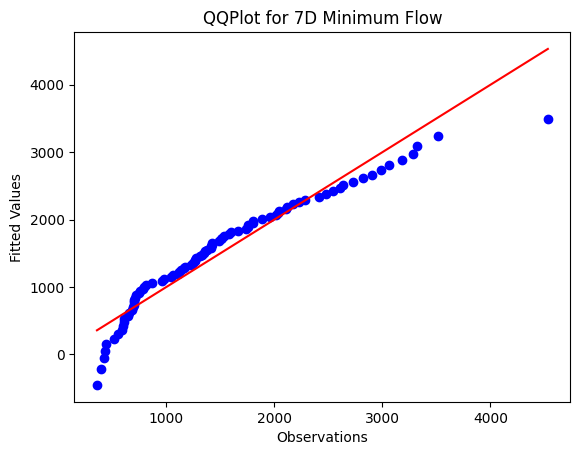

In [4]:
# Part A

# Function to find moments of data
def findMoments(data):
    xbar = np.mean(data)
    std = np.std(data, ddof=1)
    skew = ss.skew(data, bias=False)

    return xbar, std, skew

# Function to fit data to a normal distribution, using either MLE or MOM
def fitNormal(data, method):
    assert method == 'MLE' or method == 'MOM', "method must = 'MLE' or 'MOM'"

    xbar, std, skew = findMoments(data)

    if method == 'MLE':
        mu, sigma = ss.norm.fit(data)

    elif method == 'MOM':
        mu = xbar
        sigma = std

    return mu, sigma

# Function to make QQ plot for normal data with correlation test
def NormalPPCT(data, mu, sigma, title):
    x_sorted = np.sort(data)
    p_observed = np.arange(1, len(data) + 1, 1) / (len(data) + 1)
    x_fitted = ss.norm.ppf(p_observed, mu, sigma)
    rho = np.corrcoef(x_sorted, x_fitted)[0, 1]

    plt.scatter(x_sorted, x_fitted, color='b')
    plt.plot(x_sorted, x_sorted, color='r')
    plt.xlabel('Observations')
    plt.ylabel('Fitted Values')
    plt.title(title)
    #plt.savefig(figname)
    #plt.clf()

    # Estimate p-value of corelation coefficient
    rhoVector = np.zeros(10000)
    for i in range(10000):
        x = ss.norm.rvs(mu, sigma, len(data))
        rhoVector[i] = np.corrcoef(np.sort(x), x_fitted)[0, 1]

    count = 0
    for i in range(len(rhoVector)):
        if rho < rhoVector[i]:
            count = count + 1

    p_value = 1 - count / 10000

    return rho, p_value

#calculate annual minimum7-day flows
unique_years = allQ['Year'].unique()
Flow_7 = [0] * len(unique_years)
for n in range(len(unique_years)):
  X = allQ[allQ['Year'] == unique_years[n]]['Flow']
  Flow_7_all = [0] * (len(X) - 6)
  for i in range(6, len(X)):
    Flow_7_all[i - 6] = sum(X[i - 6 : i + 1])
  Flow_7[n] = min(Flow_7_all)

[mu,sigma] = fitNormal(Flow_7,'MOM')
NormalPPCT(Flow_7,mu,sigma,'QQPlot for 7D Minimum Flow')


It is not normally distributed since the p-value of corelation coefficient is very small, indicating the true correlation is much lower. I will use the transformation of box-cox because the Box-Cox transformation can help normalize skewed distributions, making them more Gaussian-like. The box-cox trasnformation has a higher rho and p-value compared to LN transformation.
After transformation, the QQ plot shows the transformed data fits normally distribution well.

[0.9935640201926601, 0.501]


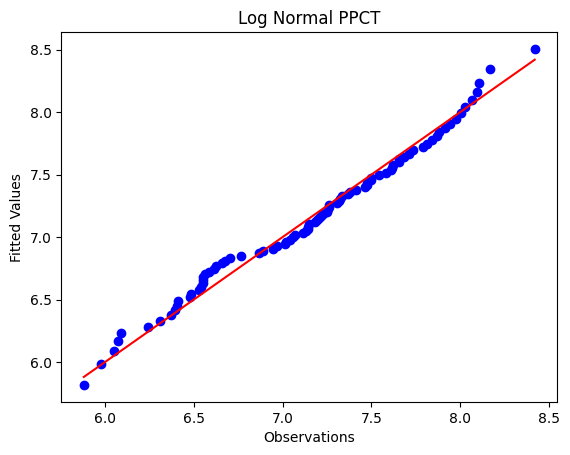

In [9]:
mu, sigma = fitNormal(np.log(Flow_7),'MOM')
rho_log, p_value_log = NormalPPCT(np.log(Flow_7), mu, sigma, 'Log Normal PPCT')
print([rho_log,p_value_log])


[0.9947014650817242, 0.6163000000000001]


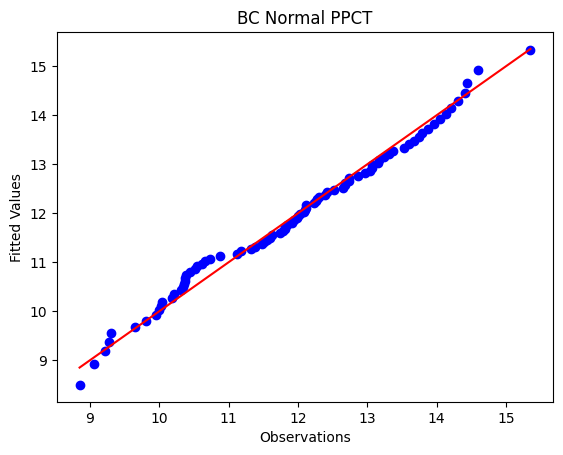

In [10]:
Flow_7_trans, llambda = ss.boxcox(Flow_7)
mu, sigma = fitNormal(Flow_7_trans,'MOM')
rho_bc, p_value_bc = NormalPPCT(Flow_7_trans, mu, sigma, 'BC Normal PPCT')
print([rho_bc,p_value_bc])

**Part B**: Let’s assume there are no seasons/cycles (I confirmed this by plotting the periodogram). Do the ACF and PACF suggest there is auto-correlation? Using visual analysis only, what ARMA model would you predict would fit the (transformed) data best and why?

According to the autocorrelation and partial autocorrelation plot, there is autocorrelation of lag 1 and 2.
It should be ARMA(2,1) because the ACF shows cut off after 1 lag and PACF shows cuts off after 2 lags.


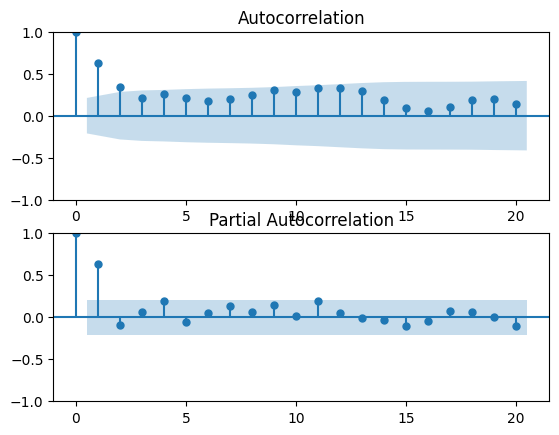

In [12]:
# Part B
fig = plt.figure() # define a new figure

# Autocorrelation Plot
ax = fig.add_subplot(2,1,1)
sm.graphics.tsa.plot_acf(Flow_7_trans,ax=ax)

# Partial Autocorrelation Plot
ax = fig.add_subplot(2,1,2)
sm.graphics.tsa.plot_pacf(Flow_7_trans,ax = ax)

print("According to the autocorrelation and partial autocorrelation plot, there is autocorrelation of lag 1 and 2.")
print("It should be ARMA(2,1) because the ACF shows cut off after 1 lag and PACF shows cuts off after 2 lags.")


**Part C:** Fit a purely ARmodel to the (transformed) minimum 7-day flows,including an intercept. Choose the AR model that minimizes the AIC. What are the model parameter estimates and their p-values?

Text(0.5, 1.0, 'AIC for AutoReg Function')

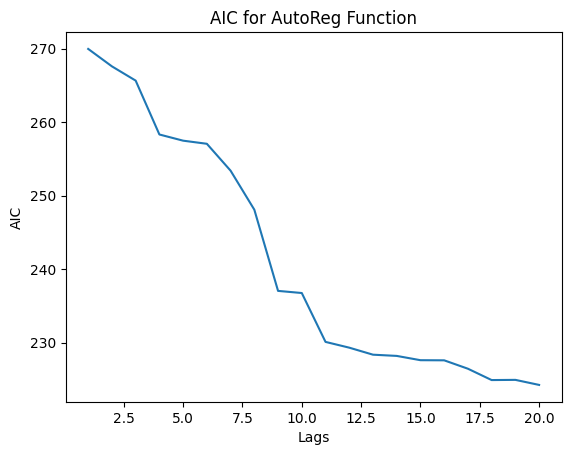

In [17]:
from statsmodels.tsa.ar_model import AutoReg
container=np.zeros(20)
for i in range(1,21):
  fit = AutoReg(Flow_7_trans, lags = i).fit()
  container[i-1]=fit.aic

plt.plot(range(1,21),container)
plt.xlabel('Lags')
plt.ylabel('AIC')
plt.title('AIC for AutoReg Function')

Based on the plot above, the AIC appears to decrease as the number of lags increases, which contradicts expectations. Both the ACF and PACF suggest that an AR(1) model should be the best fit. Additionally, when using the ARIMA function, the AIC is minimized when the lag is set to 1. Therefore, I believe that an AR(1) model should be the most suitable for fitting the data.

Text(0.5, 1.0, 'AIC for ARIMA Function')

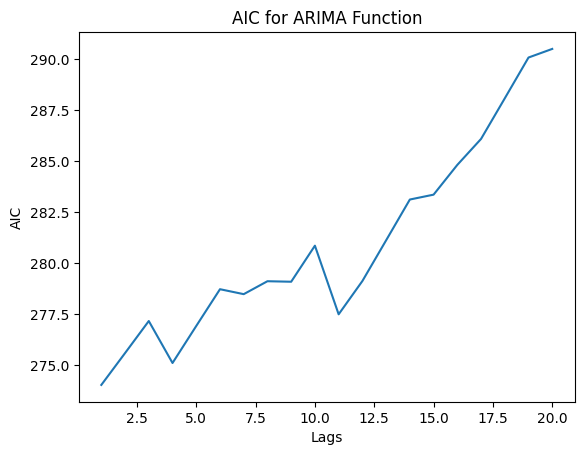

In [18]:
for i in range(1,21):
  fit = ARIMA(Flow_7_trans, order=(i,0,0)).fit()
  container[i-1]=fit.aic

plt.plot(range(1,21),container)
plt.xlabel('Lags')
plt.ylabel('AIC')
plt.title('AIC for ARIMA Function')

Parameters:
[4.25778324 0.64589932]
p-values:
[2.11279121e-05 1.05749021e-14]
AIC = 269.98182


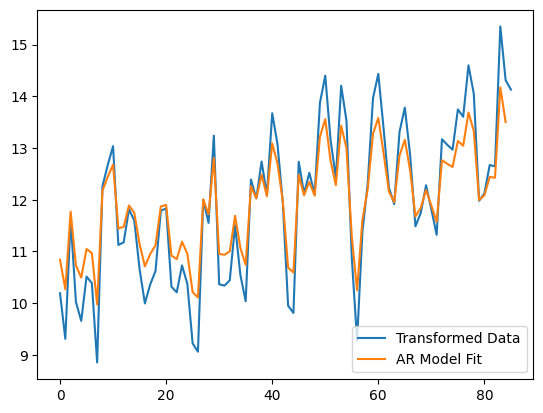

In [20]:
# Part C
# Hint: see the example of using AutoReg in: https://www.statsmodels.org/stable/examples/notebooks/generated/autoregressions.html


fit = AutoReg(Flow_7_trans, lags = 1).fit()

print('Parameters:')
print(fit.params)
print('p-values:')
print(fit.pvalues)
print('AIC = %.5f' % (fit.aic))

plt.plot(Flow_7_trans, label = 'Transformed Data')
plt.plot(fit.fittedvalues, label = 'AR Model Fit')
plt.legend(loc = 'lower right')

**Part D**: Using regression, test for a trend in the residuals of the AR model. Include an intercept in your model. Is the trend parameter statistically significant (report the p-value)? Use the Mann-Kendall test on the residuals of the AR model and compare its associated p-value.

In [21]:
# Part D
minQ = pd.DataFrame({'Year': unique_years, 'Flow_7_trans': Flow_7_trans})

# Fit AutoReg model
fit = AutoReg(minQ['Flow_7_trans'], lags=1).fit()
minQ['Residual'] = fit.resid

# Drop rows with NaN residuals
minQ.dropna(subset=['Residual'], inplace=True)

# Fit OLS model
mod = smf.ols(formula='Residual ~ Year', data=minQ)
results = mod.fit()
print(results.summary())

from scipy.stats import kendalltau
tau, p_value = kendalltau(minQ['Year'],minQ['Residual'])

print(f'P-value for OLS: {results.pvalues[1]}')
print(f'P-value for Mann-Kendall: {p_value}')



                            OLS Regression Results                            
Dep. Variable:               Residual   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     7.725
Date:                Tue, 13 Feb 2024   Prob (F-statistic):            0.00674
Time:                        02:07:31   Log-Likelihood:                -128.21
No. Observations:                  85   AIC:                             260.4
Df Residuals:                      83   BIC:                             265.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -26.8666      9.667     -2.779      0.0

The p-values for both the OLS and Mann-Kendall tests are significantly low, less than 0.05, suggesting the presence of a trend in the data. Interestingly, the p-value obtained from the Mann-Kendall test is even smaller than that from the OLS test, further emphasizing the existence of a discernible trend.

**Part E**: Might there be a change point in the median of this time series, and if so, where is it most likely to be? Report your conclusions to this question using bootstrapping (see trendDetection.py for an example comparing means).

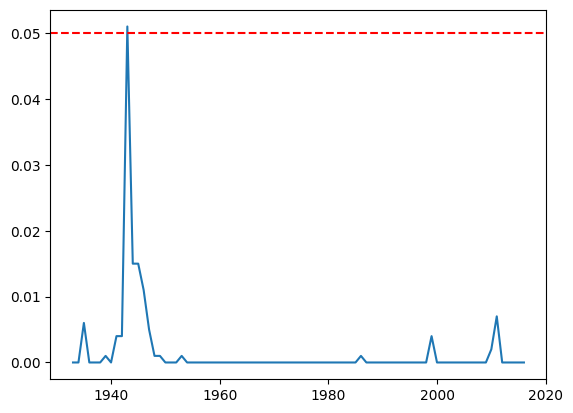

In [23]:
# Part E
nSamples = 1000
p_values = np.ones(len(Flow_7_trans) - 1)

# If we're not sure where the change point might be, loop over the time series and test every possible time period
for i in range(len(Flow_7_trans) - 1):

    # For each potential time of change point,
    # bootstrap nSamples from the time before and after the potential change point
    x = bootstrap(Flow_7_trans[:(i + 1)], nSamples) # Before the change point
    y = bootstrap(Flow_7_trans[(i + 1):], nSamples) # After the change point

    # Compute S, or the number of samples for which the mean of X is greater than the mean of Y
    S = 0
    for j in range(nSamples):
        if np.median(x[j, :]) > np.median(y[j, :]):    # This uses median; could use any other statistic
            S += 1

    # Average S over nSamples
    p_values[i] = S / nSamples

# Plot p-values of each potential change point
plt.plot(unique_years[:-2],p_values[0:-1])
# Plot alpha/2 as threshold for statistical significance (use 1-alpha/2 if necessary)

plt.axhline(y=0.05, color='r', linestyle='--')
plt.show()



There is no change point since all p values are below significance(red line = 0.05), indicating there is a trend (each point is a change point).

## **End of Problem Set  3**

**Important Notes on handing in your problem set:**

1. Please save your Google Colab notebook as a PDF by following the instructions posted on Canvas- Modules-Week3-Convert Notebook to Pdf.pdf. Next, hand in your assignment by uploading your pdf to Gradescope. Alternatively, you could follow Method 1 from this [video tutorial](https://www.youtube.com/watch?v=-Ti9Mm21uVc).
2. To help with grading, please make sure your Google Collab Notebook is shared (with edit access) with Mofan (mofanz@stanford.edu) and Aniket (aniketv@stanford.edu). In addition, please include the full link of your notebook here: {}.